<a href="https://colab.research.google.com/github/arungeethanbk/JupyterNotebook/blob/main/Salary_Prediction(L).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [7]:
df.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


In [8]:
df.dropna(inplace=True)

In [9]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer,518
Data Scientist,453
Software Engineer Manager,376
Data Analyst,363
Senior Project Engineer,318
...,...
Account Manager,1
Help Desk Analyst,1
Senior Training Specialist,1


In [10]:
job_title_count = df['Job Title'].value_counts()
job_title_edited = job_title_count[job_title_count<=25]
job_title_edited.count()

142

In [11]:
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in  job_title_edited else x)
df['Job Title'].nunique()

50

In [12]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,2265
Master's Degree,1572
PhD,1368
Bachelor's,756
High School,448
Master's,288
phD,1


In [13]:
df['Education Level'].replace(["Bachelor's Degree", "Master's Degree", "phD"],["Bachelor's", "Master's", "PhD"], inplace = True)
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's,3021
Master's,1860
PhD,1369
High School,448


In [14]:
df['Gender'].value_counts()

,count
Gender,
Male,3671
Female,3013
Other,14


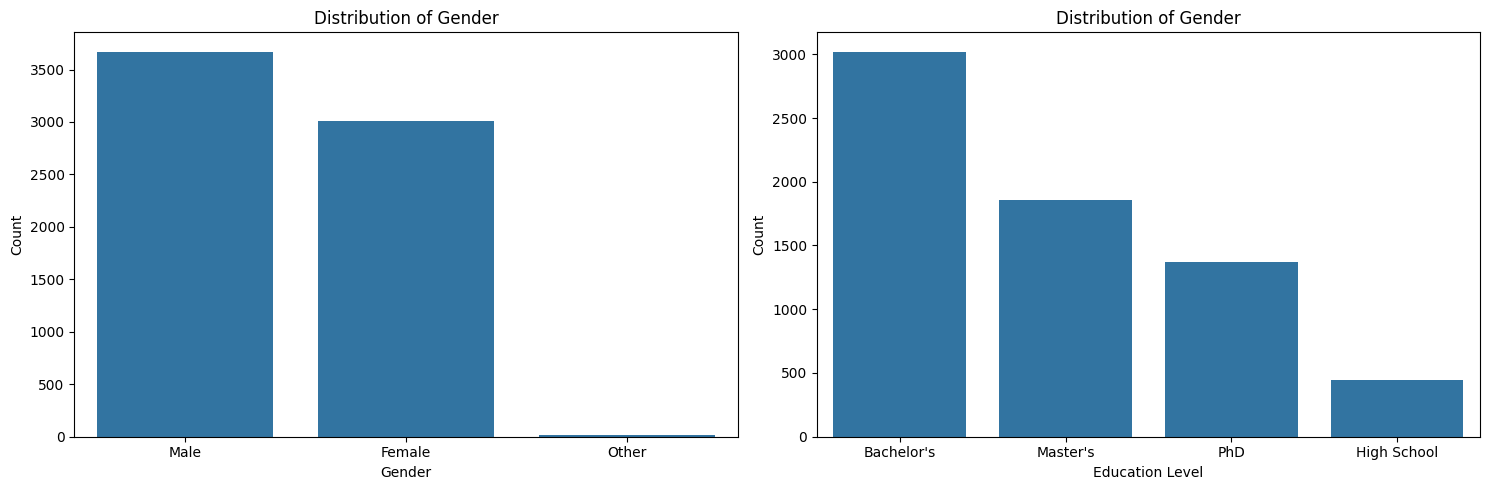

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Gender', data = df, ax=ax[0])
sns.countplot(x='Education Level', data=df, ax=ax[1])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Gender')
plt.tight_layout()
plt.show()

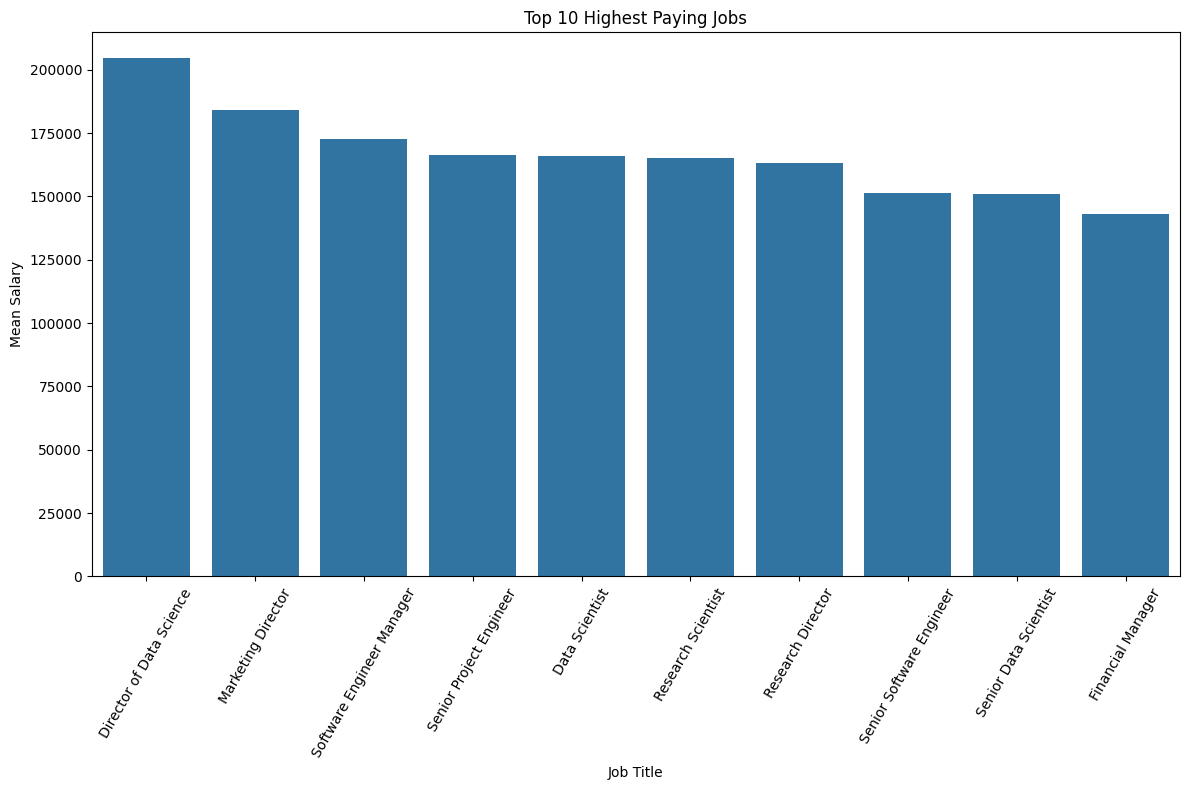

In [16]:
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

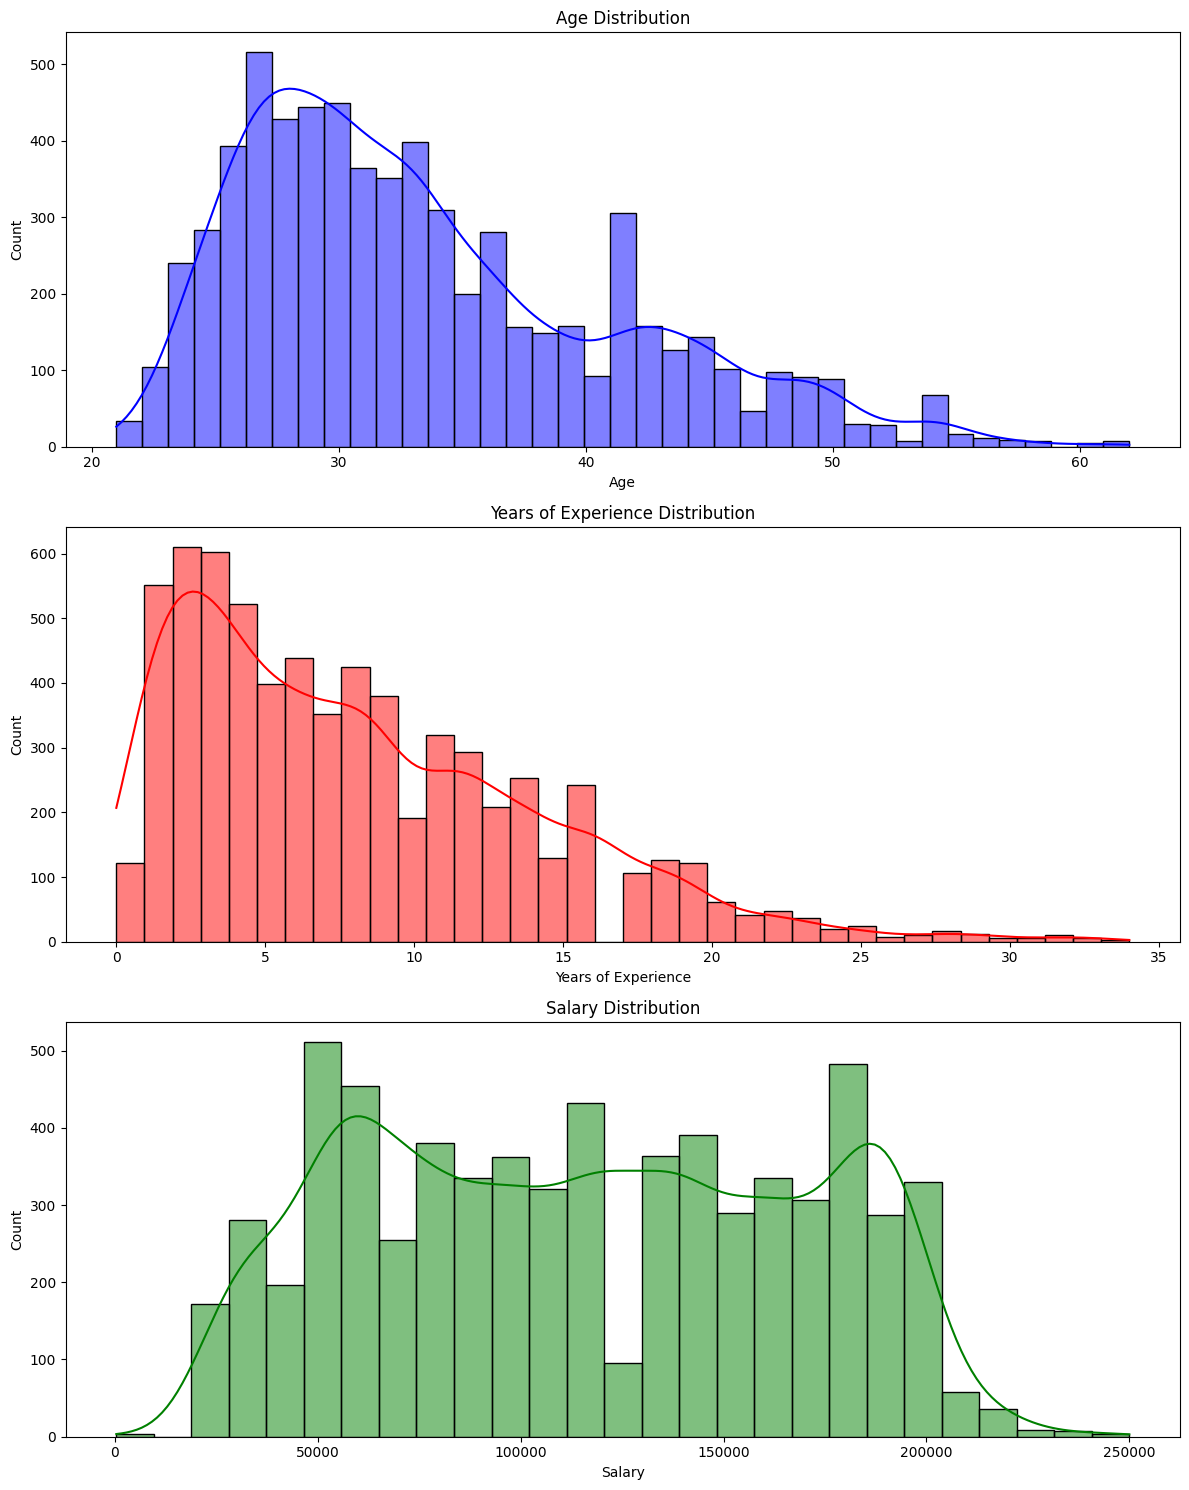

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(12,15))
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')
sns.histplot(df['Years of Experience'], ax=ax[1], color = 'red', kde = True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')
plt.tight_layout()
plt.show()

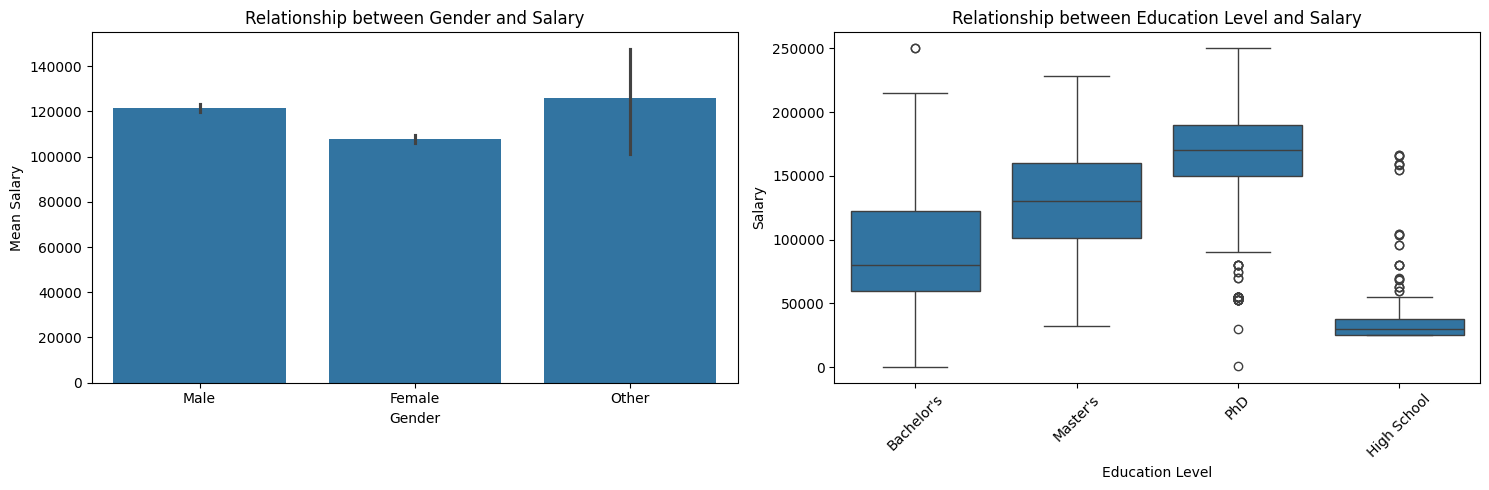

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='Gender', y='Salary', data=df, ax=ax[0])
ax[0].set(title='Relationship between Gender and Salary', xlabel='Gender', ylabel='Mean Salary')
sns.boxplot(x='Education Level', y='Salary', data=df, ax=ax[1])
ax[1].set(title='Relationship between Education Level and Salary', xlabel = 'Education Level', ylabel='Salary')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

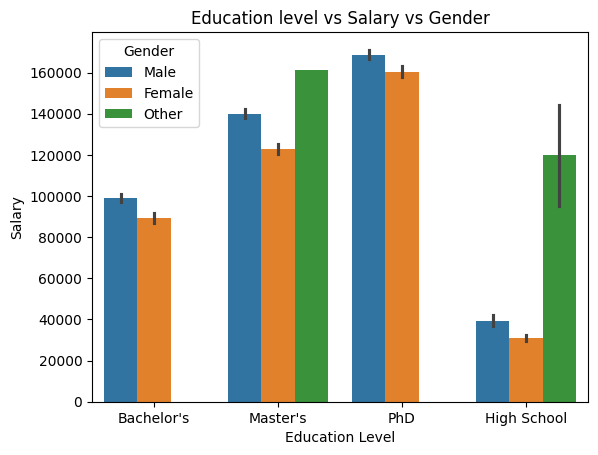

In [19]:
sns.barplot(x='Education Level', y='Salary', data=df, hue='Gender').set(title='Education level vs Salary vs Gender')
plt.show()

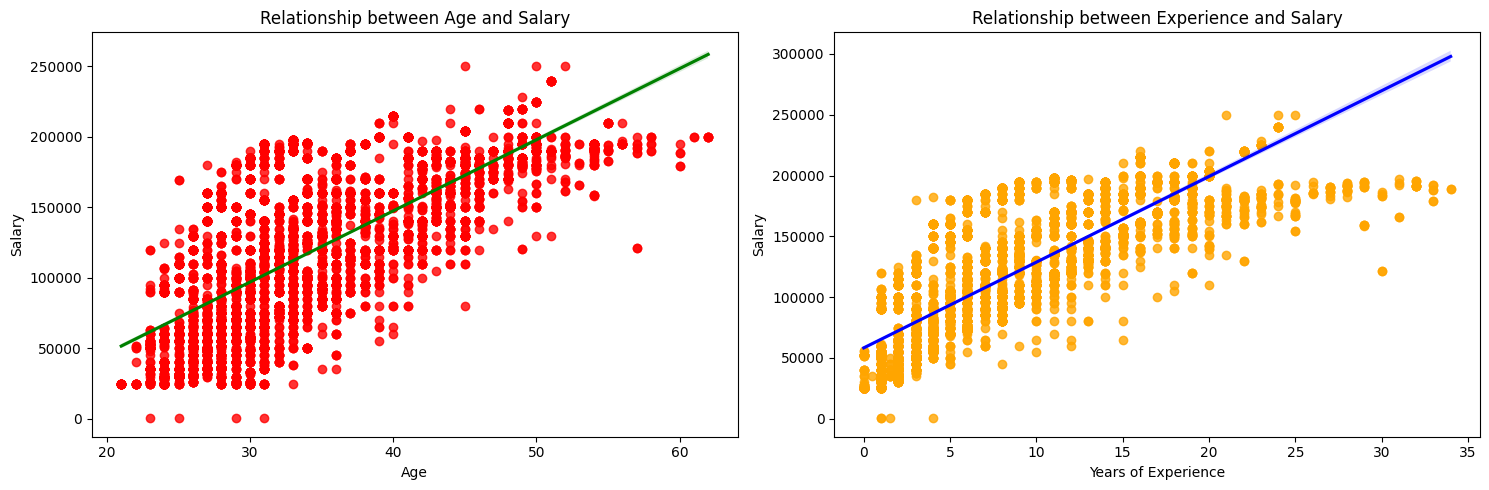

In [20]:
fig, ax = plt.subplots(1,2, figsize =(15,5))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'color':'red'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')
sns.regplot(x='Years of Experience', y='Salary', data=df, scatter_kws={'color':'orange'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and Salary')
plt.tight_layout()
plt.show()

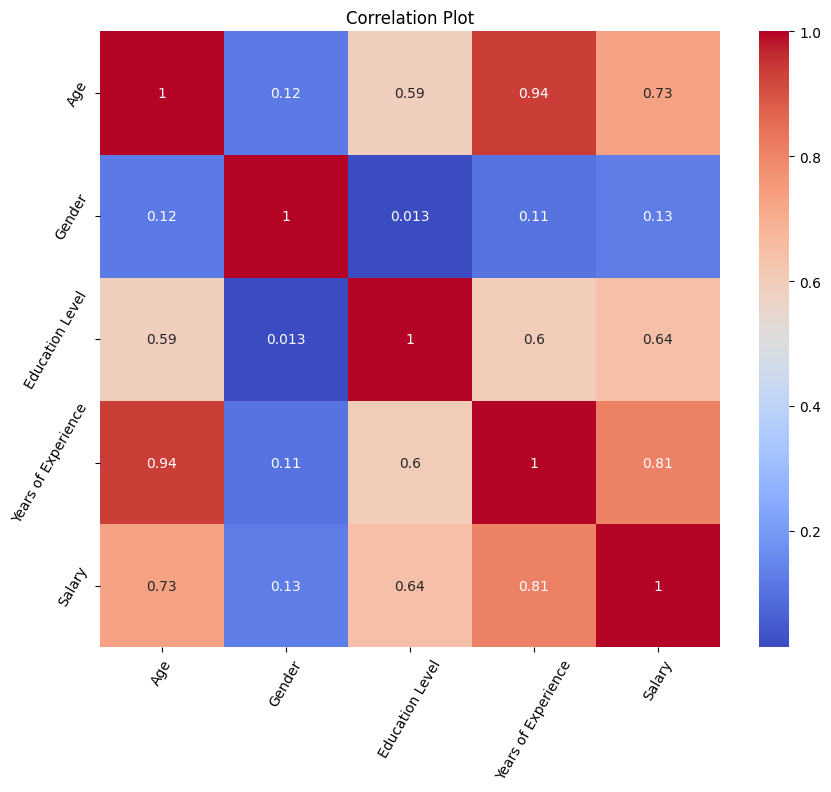

In [21]:
education_mapping = {"High School": 0, "Bachelor's":1, "Master's":2, 'PhD':3}
df['Education Level'] = df['Education Level'].map(education_mapping)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

In [22]:
q1 = df.Salary.quantile(0.25)
q3 = df.Salary.quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

In [23]:
df[df.Salary > upper_bound]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [25]:
df[df.Salary < lower_bound]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [26]:
dummies = pd.get_dummies(df['Job Title'], drop_first = True)
df = pd.concat([df, dummies], axis=1)
df.drop('Job Title', inplace=True, axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,Director of Data Science,...,Senior HR Generalist,Senior Human Resources Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,1,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,0,2,3.0,65000.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,3,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,1,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,2,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
features = df.drop('Salary', axis=1)
target = df['Salary']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
x_train.shape

(5023, 53)

In [50]:
model_params = {
    'Linear Regression':{
        'model': LinearRegression(),
        'params':{
            'fit_intercept':[True, False]
        }
    },
    'Decision Tree':{
        'model': DecisionTreeRegressor(),
        'params':{
           'max_depth':[2,4,6,8,10],
           'random_state':[0,42],
           'min_samples_leaf':[1, 5,10,20]
        }
    },
    'Random Forest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[10,30,20,50,80]
          }
    }

}

In [51]:
from sklearn.impute import SimpleImputer
score=[]
for model_name, m in model_params.items():
  imputer = SimpleImputer(strategy='mean')
  x_train_imputed = imputer.fit_transform(x_train)
  clf = GridSearchCV(m['model'], m['params'], cv=5,scoring='neg_mean_squared_error')
  clf.fit(x_train_imputed, y_train)
  score.append({
      'model': model_name,
      'Params':clf.best_params_,
      'MSE(-ve)':clf.best_score_
  })
pd.DataFrame(score)

,model,Params,MSE(-ve)
0,Linear Regression,{'fit_intercept': True},-4.642012e+08
1,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'rand...",-1.512974e+08
2,Random Forest,{'n_estimators': 80},-6.828473e+07


In [52]:
s = pd.DataFrame(score)
sort = s.sort_values(by='MSE(-ve)', ascending=False)
sort

,model,Params,MSE(-ve)
2,Random Forest,{'n_estimators': 80},-6.828473e+07
1,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 1, 'rand...",-1.512974e+08
0,Linear Regression,{'fit_intercept': True},-4.642012e+08


In [53]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20)

In [54]:
rfr.score(x_train, y_train)

0.9912754846996765

In [55]:
y_pred_rfr = rfr.predict(x_test)

In [56]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_rfr))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rfr))
print('Root Mean Squared Error:', mean_squared_error(y_test,y_pred_rfr, squared=False))

Mean Squared Error: 81030392.38800868
Mean Absolute Error: 3427.56644511278
Root Mean Squared Error: 9001.688307645887


In [58]:
dtr = DecisionTreeRegressor(max_depth=8, min_samples_split=2, random_state=-0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [59]:
dtr.score(x_train, y_train)

0.9397724839750347

In [62]:
y_pred_dtr = dtr.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dtr))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dtr))
print('Root Mean Squared Error:', mean_squared_error(y_test,y_pred_dtr, squared=False))

Mean Squared Error: 218135580.3533533
Mean Absolute Error: 9639.858713253943
Root Mean Squared Error: 14769.41367669527


In [64]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)

LinearRegression()

In [65]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

lr = LinearRegression(fit_intercept=True)
lr.fit(x_train_imputed, y_train)
lr.score(x_test, y_test)

0.8329414604682001

In [68]:
y_pred_lr = lr.predict(x_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', mean_squared_error(y_test,y_pred_lr, squared=False))

Mean Squared Error: 476330332.4276322
Mean Absolute Error: 15753.355437075003
Root Mean Squared Error: 21824.99329731013


In [69]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)
lr = LinearRegression(fit_intercept=True)
lr.fit(x_train_imputed, y_train)
lr.score(x_test, y_test)
features_importance = rfr.feature_importances_
features_names = df.columns.tolist()

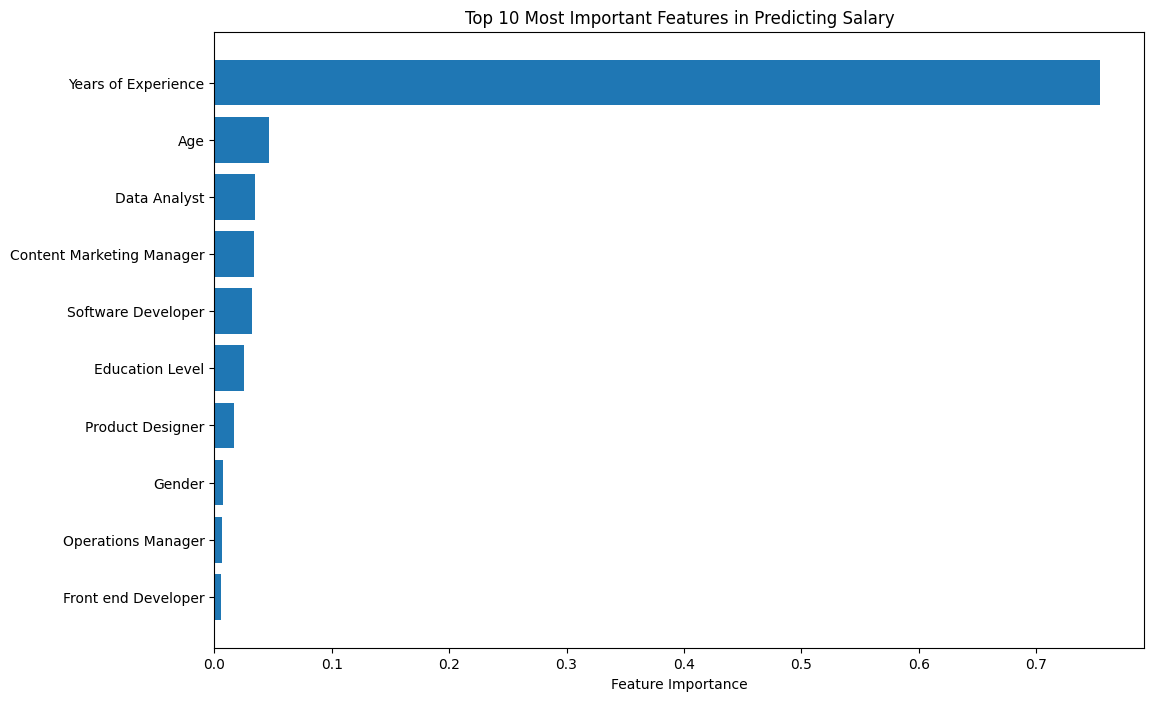

In [75]:
sorted_indices = np.argsort(features_importance)[::-1]
sorted_features_importances = [features_importance[i] for i in sorted_indices]
sorted_features_names = [features_names[i] for i in sorted_indices]
plt.figure(figsize=(12, 8))
plt.barh(sorted_features_names[:10], sorted_features_importances[:10] )
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features in Predicting Salary')
plt.gca().invert_yaxis()
plt.show()